In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from PIL import Image


sns.set_style('darkgrid')


In [3]:
folder_path = 'C:\\Users\\Dell\\Downloads\\train'


In [4]:

# Initialize lists to store data from CSV files and images
csv_data = []
image_data = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame and store it
        df = pd.read_csv(file_path)
        csv_data.append(df)
    
    # Check if the file is an image file
    elif file_name.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Open and store the image using PIL
        img = Image.open(file_path)
        image_data.append(img)

# Now you have a list of DataFrames (csv_data) and a list of images (image_data)
# You can process them further as needed


In [5]:
df.head()

filename  width  height  \
0  frame_0093_jpg.rf.2612bfbbd4b2466f8eeb15dae53f...    320     240   
1  frame_060_jpg.rf.262407bdd3f7cc62693bcd124b057...    320     240   
2  frame_042_jpg.rf.262834e1274519df304aca95c1692...    320     240   
3  frame_104_jpg.rf.263a1bfeb57ad757ed10e5fca95e7...    320     240   
4  frame_018_jpg.rf.263f1c3fe9046bfad02b58b6e7492...    320     240   

        class  xmin  ymin  xmax  ymax  
0  Electrical    39   148    62   228  
1       Solid    61    39   201   157  
2  Electrical   122    87   157   141  
3       Metal    92    64   190   181  
4       Metal   119    47   201   180

In [6]:
string_value = 'C:\\Users\\Dell\\Downloads\\train\\'
new_p = []  
for i in range(len(df['filename'])):
    new_path = string_value + df['filename'][i]
    new_p.append(new_path)
df['new_path']=new_p 
df.drop('filename', axis=1, inplace=True)
df.head()


width  height       class  xmin  ymin  xmax  ymax  \
0    320     240  Electrical    39   148    62   228   
1    320     240       Solid    61    39   201   157   
2    320     240  Electrical   122    87   157   141   
3    320     240       Metal    92    64   190   181   
4    320     240       Metal   119    47   201   180   

                                            new_path  
0  C:\Users\Dell\Downloads\train\frame_0093_jpg.r...  
1  C:\Users\Dell\Downloads\train\frame_060_jpg.rf...  
2  C:\Users\Dell\Downloads\train\frame_042_jpg.rf...  
3  C:\Users\Dell\Downloads\train\frame_104_jpg.rf...  
4  C:\Users\Dell\Downloads\train\frame_018_jpg.rf...

In [7]:
df['class'].unique()

array(['Electrical', 'Solid', 'Metal', 'Cooking Oil', 'Liquid', 'Gas'],
      dtype=object)

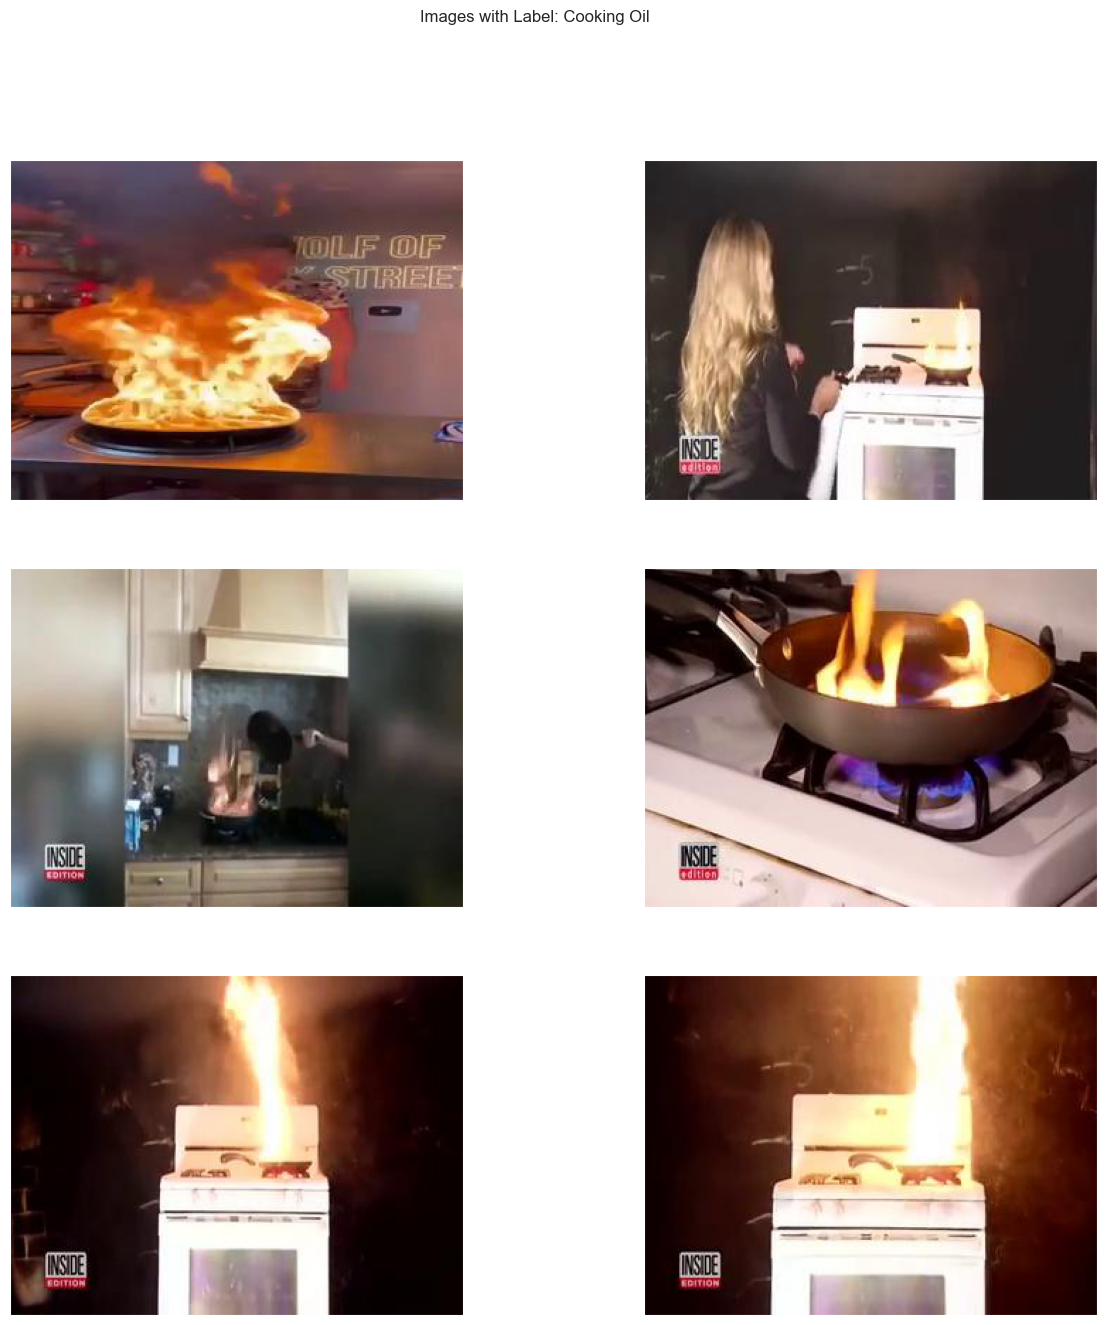

In [8]:
label = 'Cooking Oil'  # Label for images with 'Metal' class
data = df[df['class'] == label]
sns.set_style('dark')

pics = 6  # Set the number of pictures to display
fig, ax = plt.subplots(int(pics // 2), 2, figsize=(15, 15))
plt.suptitle(f'Images with Label: {label}')  # Update the title
ax = ax.ravel()

for i in range(pics):
    path = data.sample(1).loc[:, 'new_path'].to_numpy()[0]  # Use 'data' DataFrame to sample images
    img = image.load_img(path)
    img = image.img_to_array(img) / 255.0
    ax[i].imshow(img)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].axes.get_yaxis().set_visible(False)

plt.show()


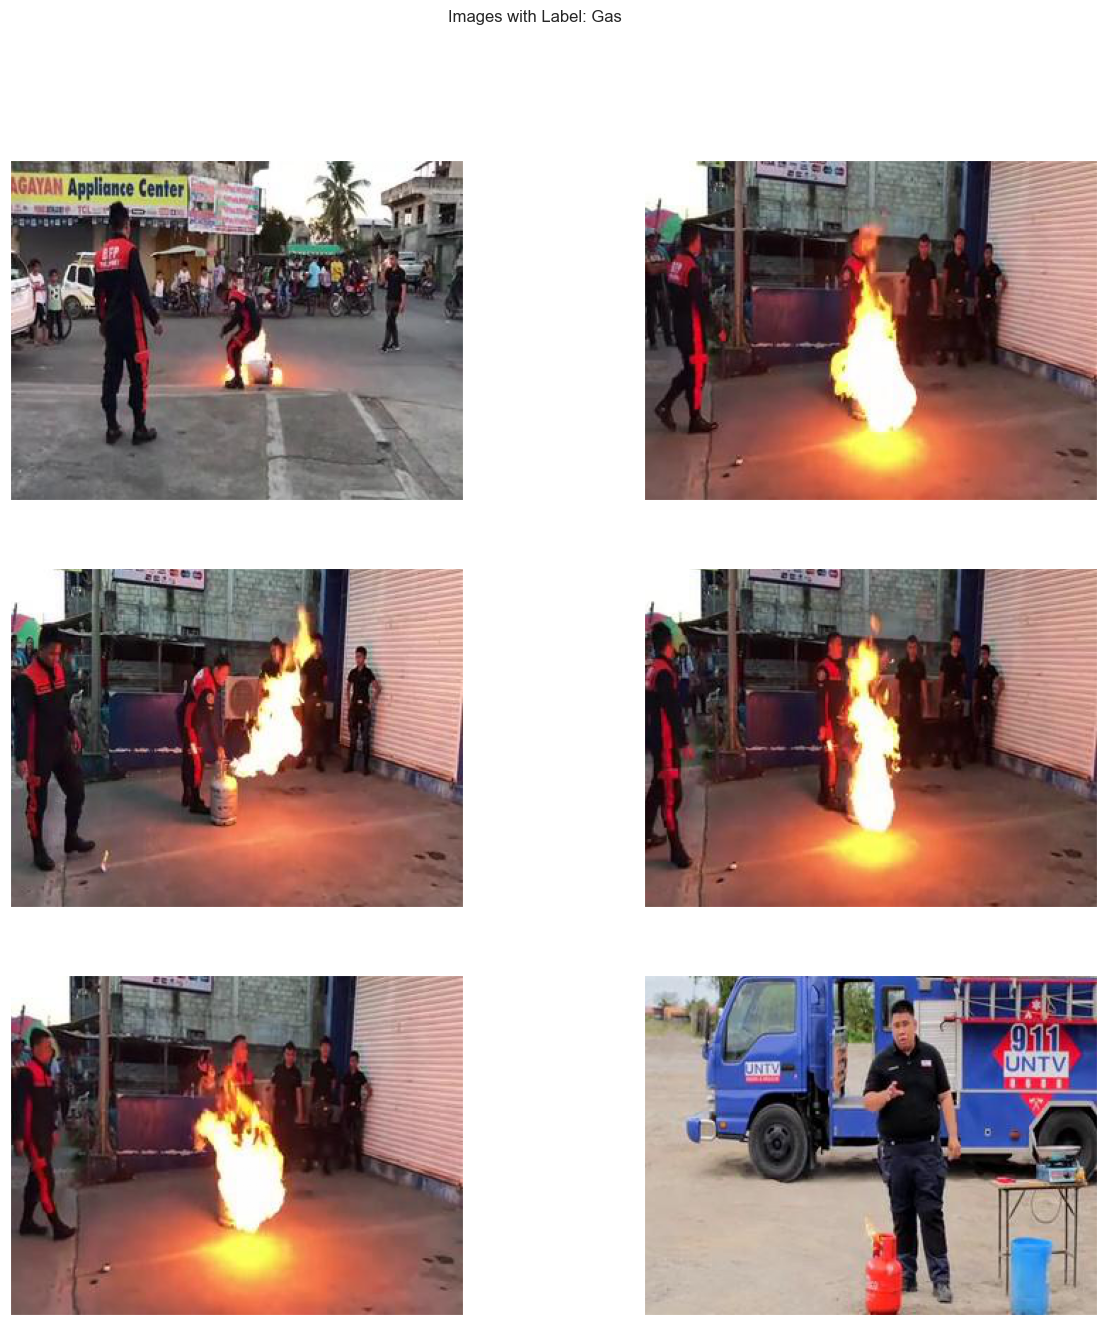

In [9]:
label = 'Gas'  # Label for images with 'Metal' class
data = df[df['class'] == label]
sns.set_style('dark')

pics = 6  # Set the number of pictures to display
fig, ax = plt.subplots(int(pics // 2), 2, figsize=(15, 15))
plt.suptitle(f'Images with Label: {label}')  # Update the title
ax = ax.ravel()

for i in range(pics):
    path = data.sample(1).loc[:, 'new_path'].to_numpy()[0]  # Use 'data' DataFrame to sample images
    img = image.load_img(path)
    img = image.img_to_array(img) / 255.0
    ax[i].imshow(img)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].axes.get_yaxis().set_visible(False)

plt.show()

In [10]:


import plotly.express as px
fig = px.pie(df, names='class', title='Class Distribution')
fig.show()
